In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

file_path = '/content/drive/MyDrive/ML/housing.csv'

df = pd.read_csv(file_path)

df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Data Exploration and Preprocessing: Impute Missing Values

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

/tmp/ipython-input-1492620623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


Encode Categorical Column

In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

Feature-Target Split

In [ ]:
X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']                 # Target

Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluate Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MSE: 4730676245.23
RMSE: 68779.91
R² Score: 0.6396


 Plot Regression Line (vs 1 Feature)

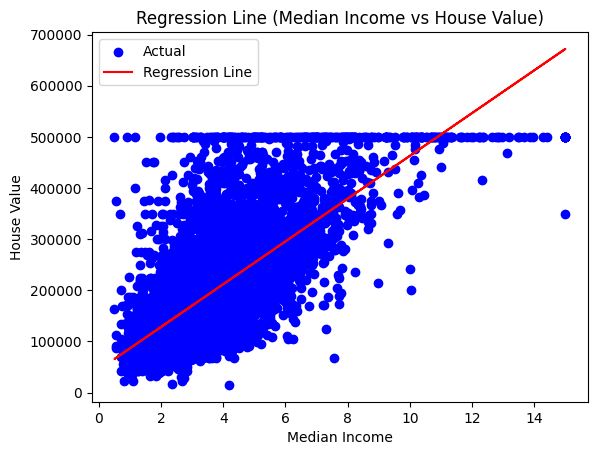

In [ ]:
import matplotlib.pyplot as plt

# Example: Median Income vs House Value
feature = 'median_income'
X_feature = df[[feature]]
y_target = y

# Train on single feature for visualization
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)
simple_model = LinearRegression()
simple_model.fit(Xf_train, yf_train)
y_line = simple_model.predict(Xf_test)

# Plot
plt.scatter(Xf_test, yf_test, color='blue', label='Actual')
plt.plot(Xf_test, y_line, color='red', label='Regression Line')
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.legend()
plt.title("Regression Line (Median Income vs House Value)")
plt.show()

Plot Residuals

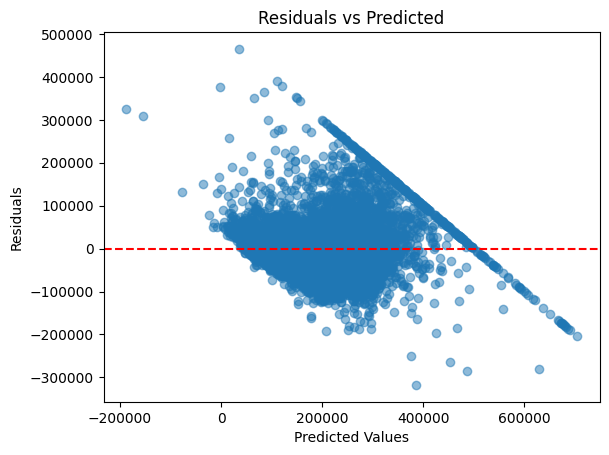

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()